In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.output {font-size:13pt; font-weight : bold;}
div.input {font-family:Consolas; font-size:13pt;}
</style>
"""))

<b><font color = "red" size = "6">ch13. 데이터 시각화</font></b>
- pip install matplotlib
- pip install seaborn

# 3절. Seaborn
    - matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
        * seaborn API : https://seaborn.pydata.org/api.html
        * 공식 사이트 : https://seaborn.pydata.org/index.html
    - Seaborn으로 그래프를 그리기 위해서 다음 단계를 따른다.
        1) 데이터 준비
        2) 미적속성 설정
        3) 함수를 이용하여 그래프 그리기
        4) 그래프 출력, 저장

In [110]:
# 시작 전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 한글 설정
plt.rc('font', family = 'Malgun Gothic')
# plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

# 경고메세지
import warnings
warnings.filterwarnings(action = 'ignore')

## 3.1 데이터 준비하기

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# iris열의 dtype, 전체 행수, 열별 결측치를 제외한 데이터 갯수, 메모리 사용량
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
titanic = sns.load_dataset('titanic')
titanic.head()

# sibsp : 함께 탑승한 형제나 배우자의 수
# pclass : 몇등석인지
# parch : 함께 탑승한 부모나 아이의 수
# fare : 탑승료

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3.2 미적 속성 설정하기(style, context, palette)
### 3.2.1 그래프 스타일 지정
- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

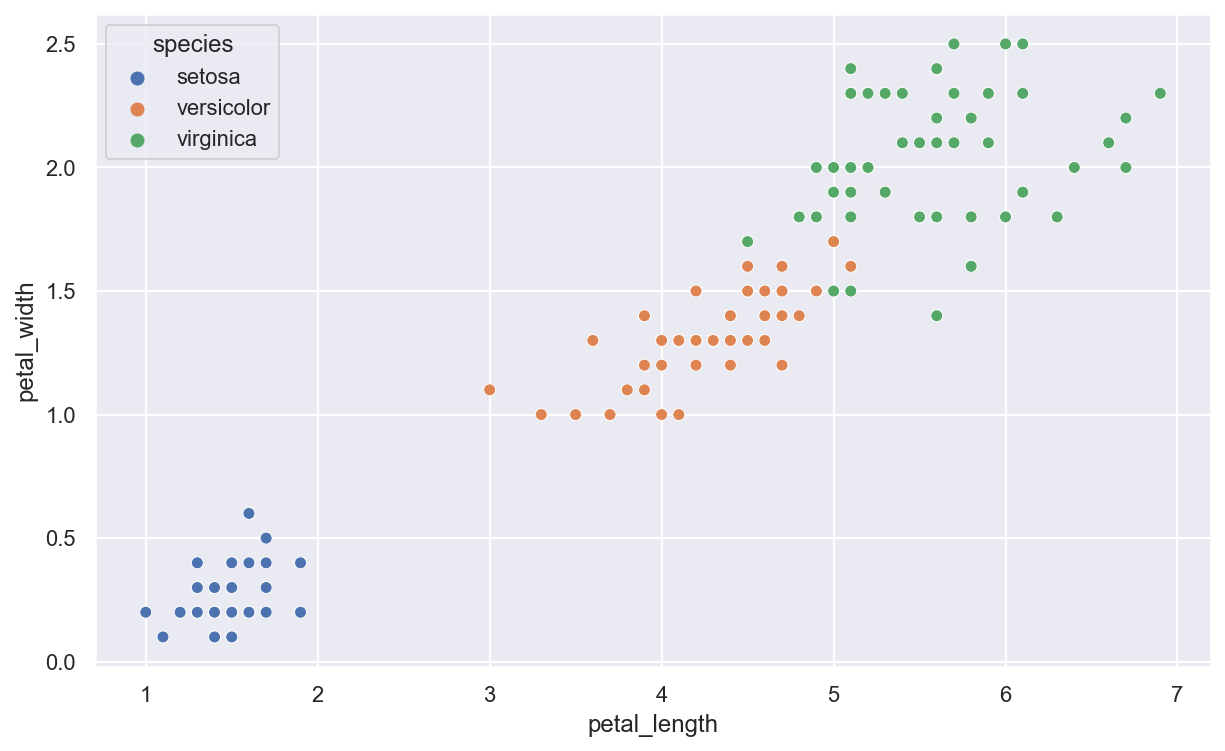

In [25]:
# whitegrid, white(기본), black, ticks, darkgrid 5개만 사용가능
plt.figure(figsize = (10, 6))
sns.set(style = 'darkgrid', context = 'talk')
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', 
                hue = 'species')

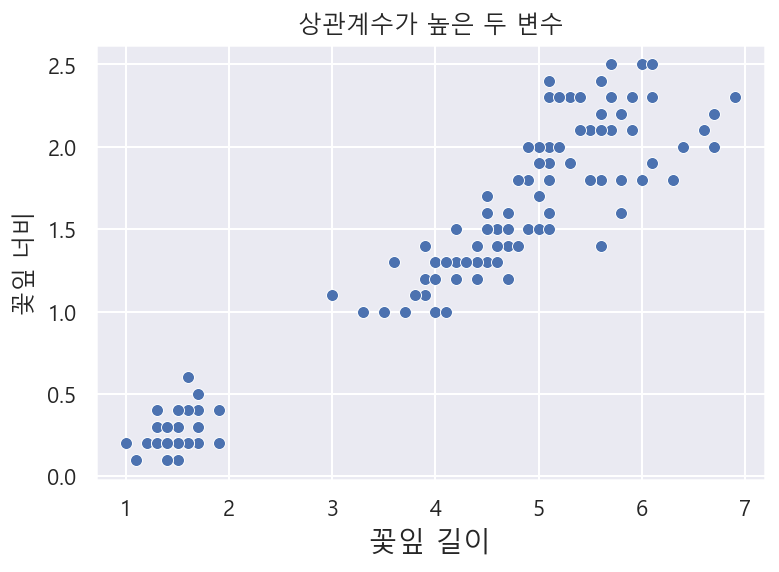

In [31]:
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width')
ax.set(title='상관계수가 높은 두 변수', 
       ylabel='꽃잎 너비', xlabel='꽃잎길이')
ax.set_xlabel('꽃잎 길이', fontsize = 14)

plt.show()

### 3.2.2 context 지정(비율)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

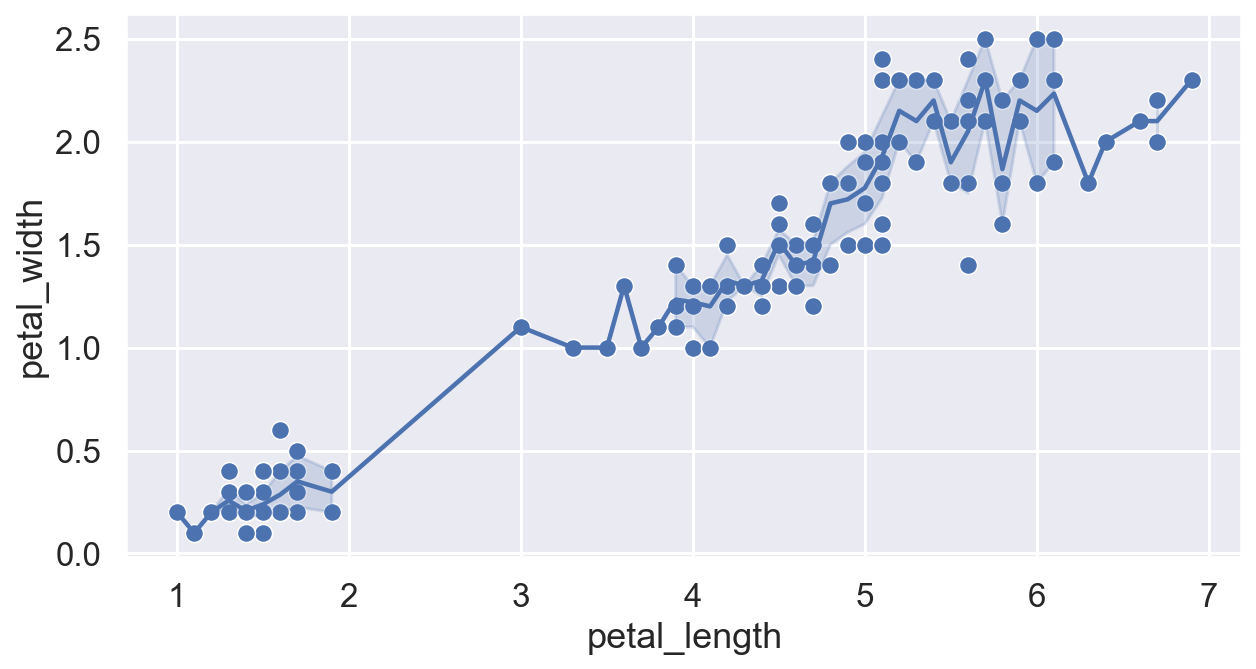

In [35]:
plt.figure(figsize = (10, 5))
sns.set(context = 'talk') # notebook(기본, 1배율), paper(0.8), talk(1.3), poster(1.8)

sns.scatterplot(data=iris, x='petal_length', y='petal_width')
sns.lineplot(data=iris, x='petal_length', y='petal_width')

### 3.2.3 컬러 팔레트
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette<br>
https://matplotlib.org/tutorials/colors/colormaps.html<br>
https://seaborn.pydata.org/tutorial/color_palettes.html<br>
http://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

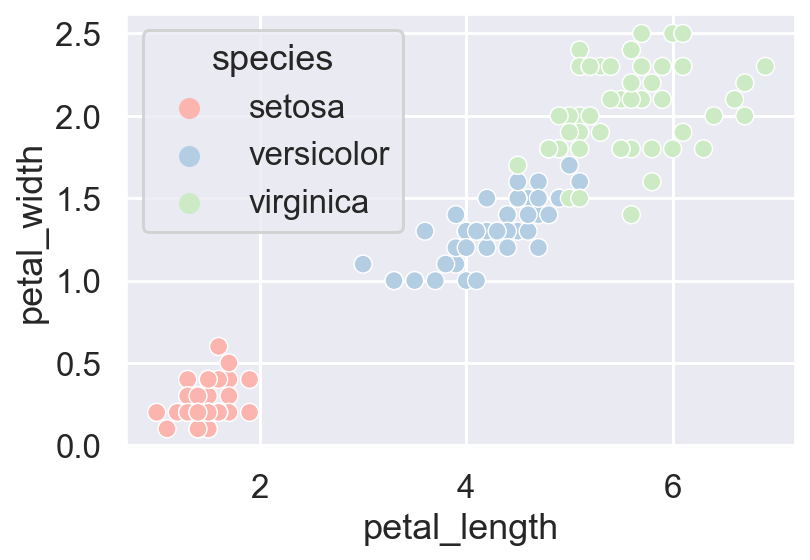

In [39]:
sns.set(palette='Pastel1', context = 'talk')
sns.scatterplot(data=iris, x='petal_length', 
                y='petal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

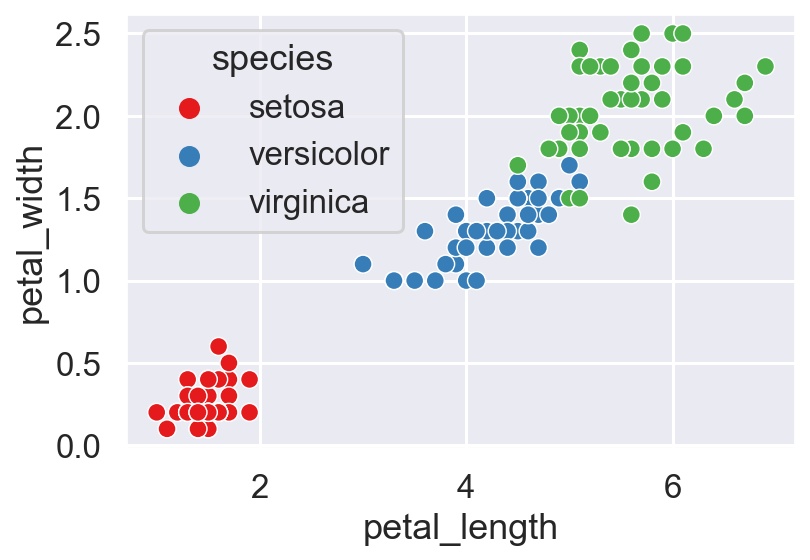

In [42]:
sns.set_palette('Set1', 3) # 2: 기본 사이클의 수
# deep/muted/bright/pastel/dark/...
sns.scatterplot(data=iris, x='petal_length', 
                y='petal_width', hue='species')

## 3.3 Seaborn 함수로 그래프 그리기

### 3.3.1 관계형 그래프(Relational plots)
    * scatterplot, lineplot, relplot(서브플롯제공)

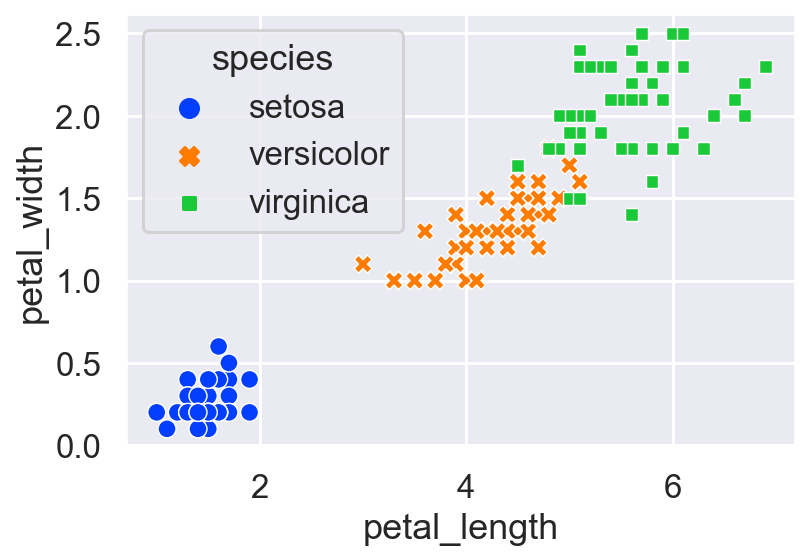

In [44]:
# 종 별 다른 색상과 스타일의 scatterplot
sns.scatterplot(data=iris, x='petal_length', 
                y='petal_width', hue = 'species', palette='bright', 
                style='species')
plt.show()

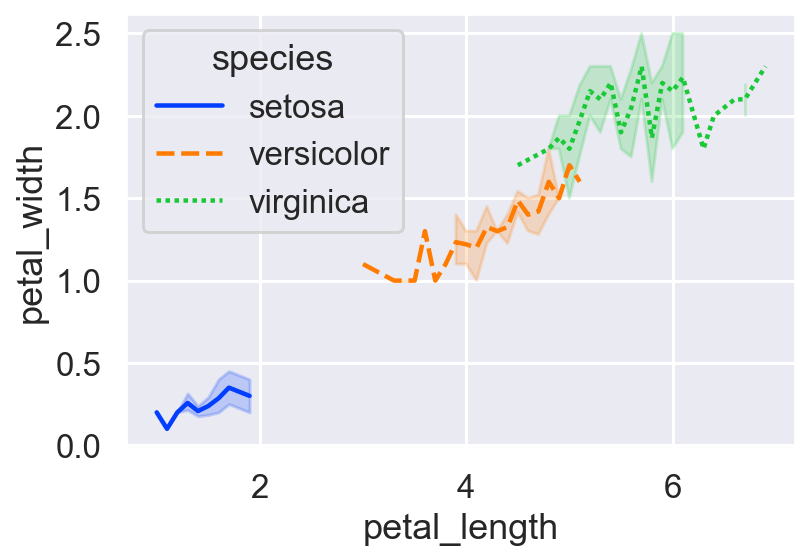

In [45]:
# 종 별 다른 색상과 스타일의 lineplot
sns.lineplot(data=iris, x='petal_length', 
                y='petal_width', hue = 'species', palette='bright', 
                style='species')
plt.show()

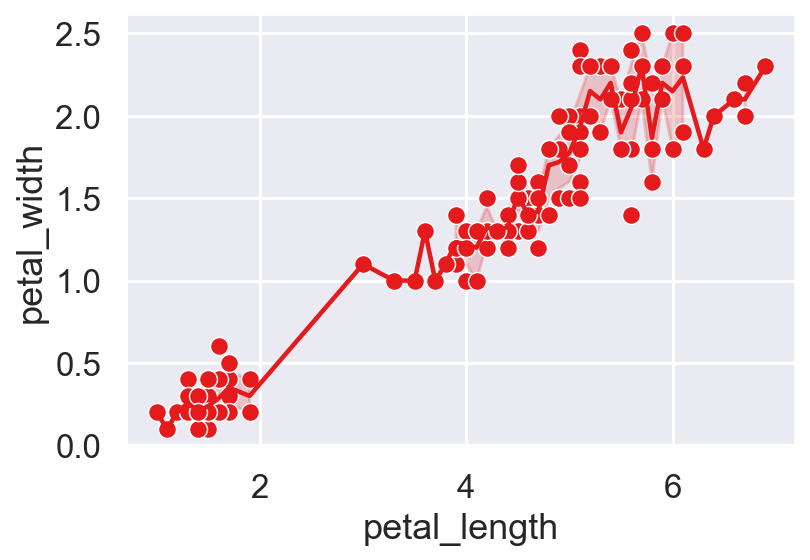

In [47]:
sns.lineplot(data=iris, x='petal_length', 
                y='petal_width')
sns.scatterplot(data=iris, x='petal_length', 
                y='petal_width')
plt.show()

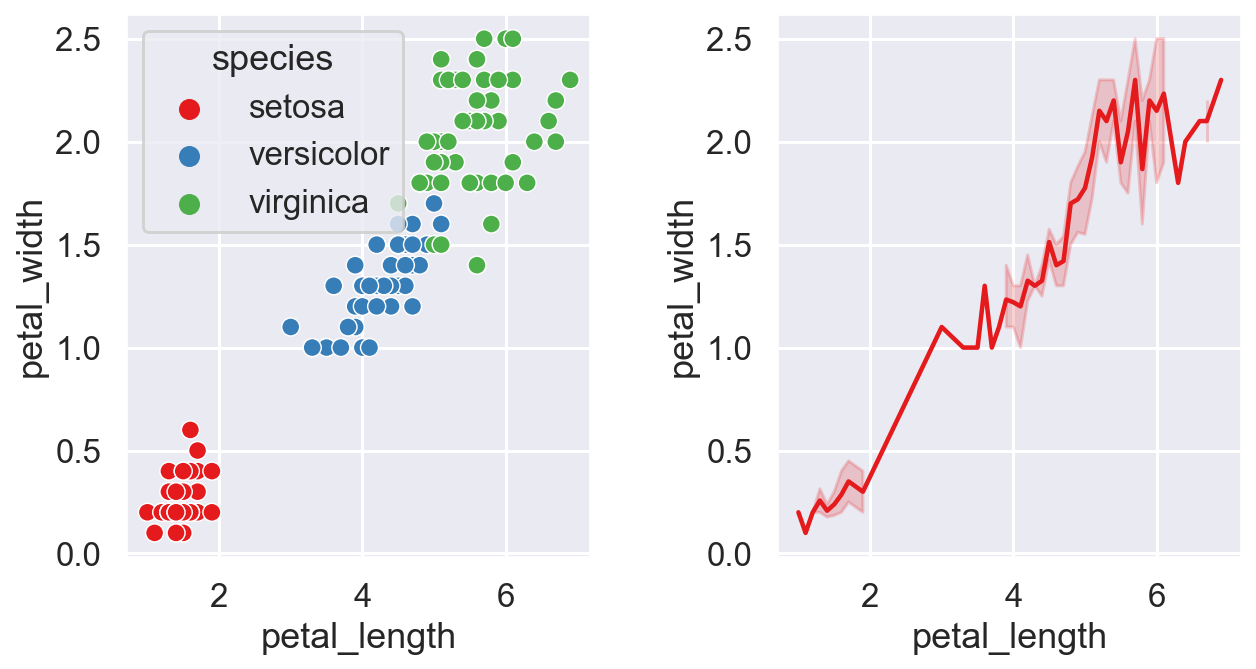

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', 
                hue='species', ax=axes[0])

sns.lineplot(data=iris, x='petal_length', 
                y='petal_width', ax=axes[1])

plt.show()

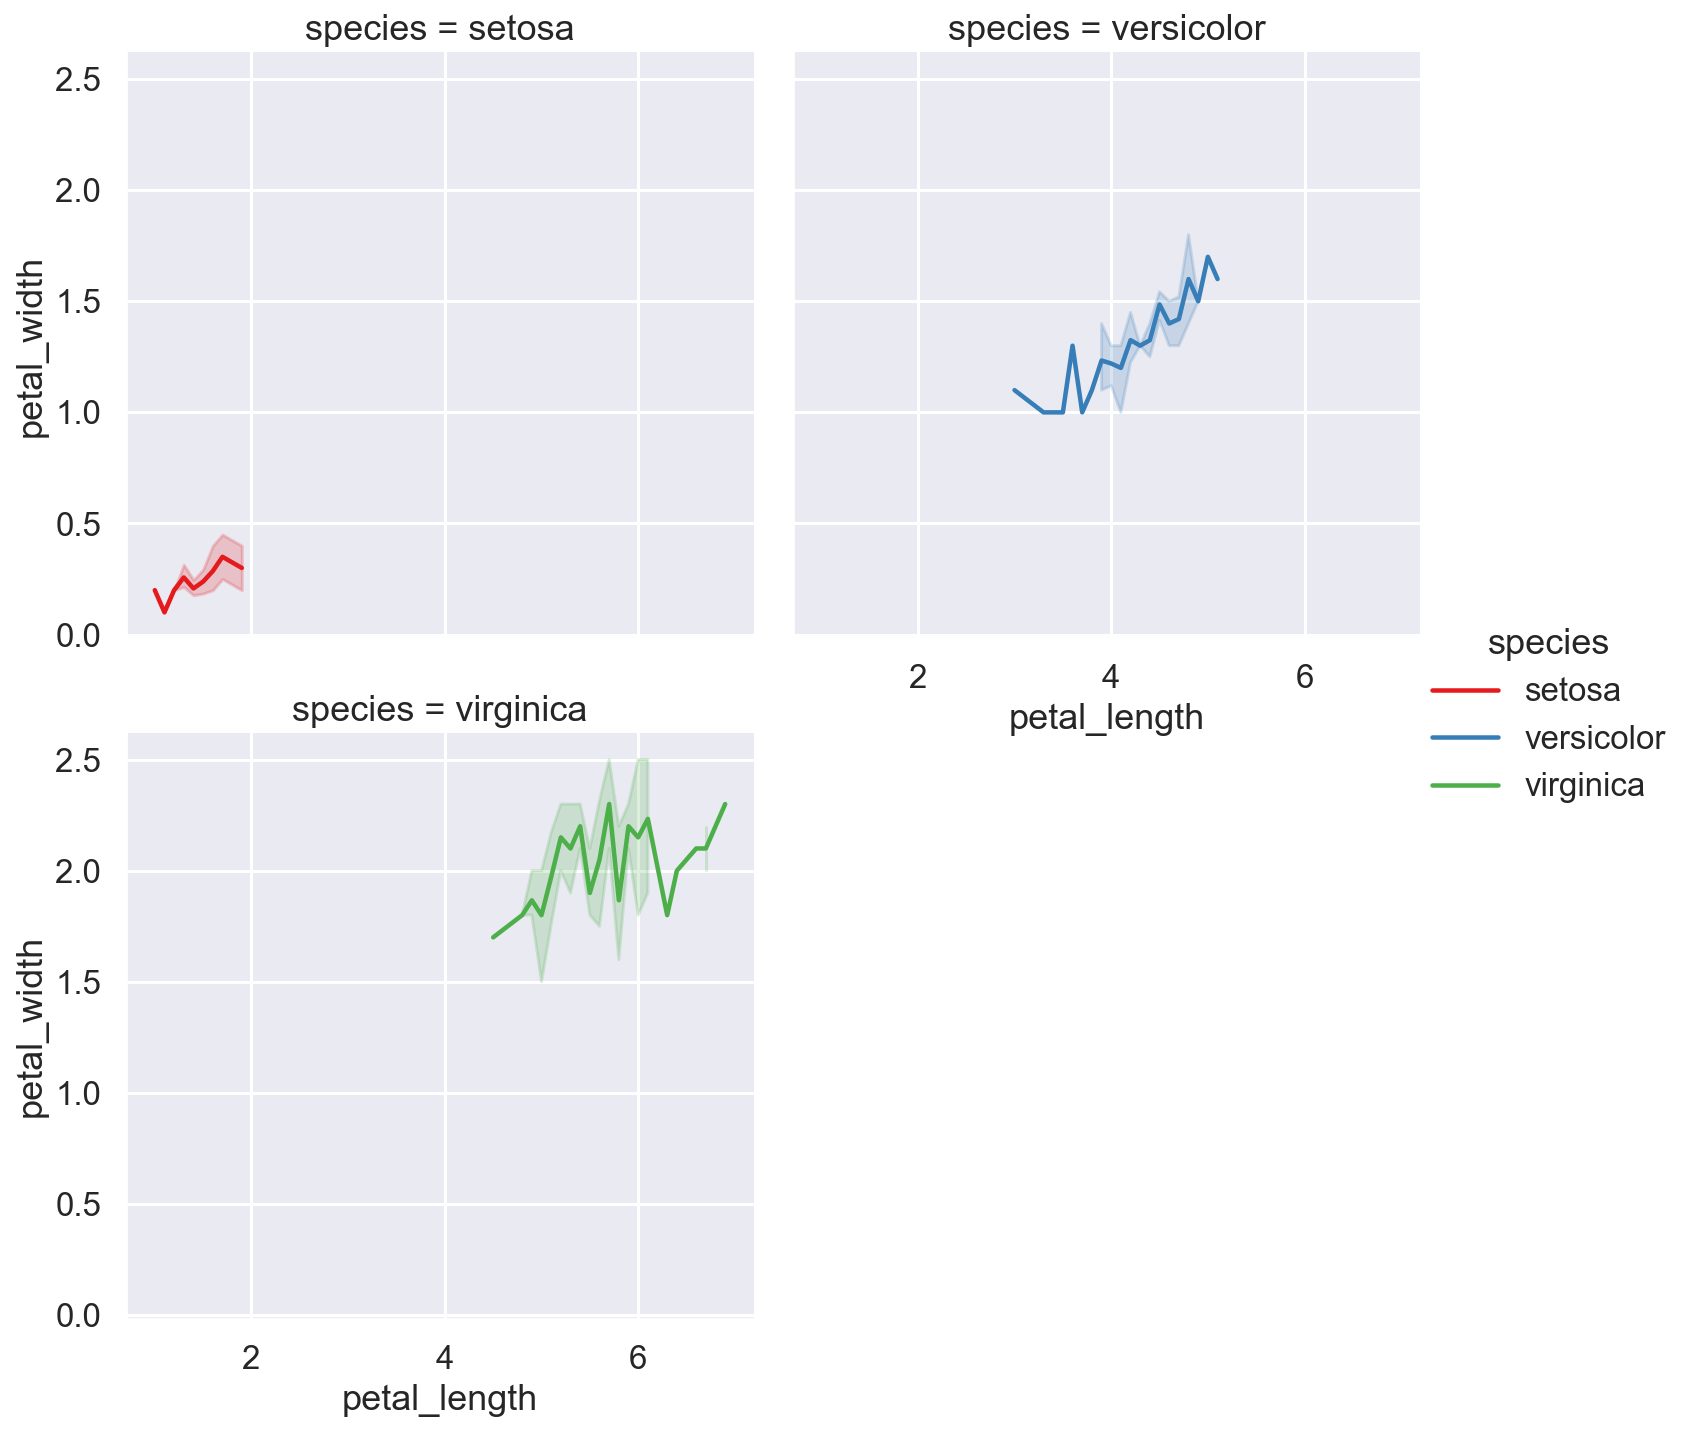

In [59]:
# lineplot을 서브플롯으로 나타내기(종 별) -> relplot(관계형 그래프에서 서브플롯을 그리는 함수)
sns.relplot(data=iris, x='petal_length', 
                y='petal_width', hue='species', kind='line', # 기본값은 scatter
            col='species', col_wrap=2) # col 단위로 서브플롯 표현
                                       # col_wrap : 한줄에 표현될 subplot

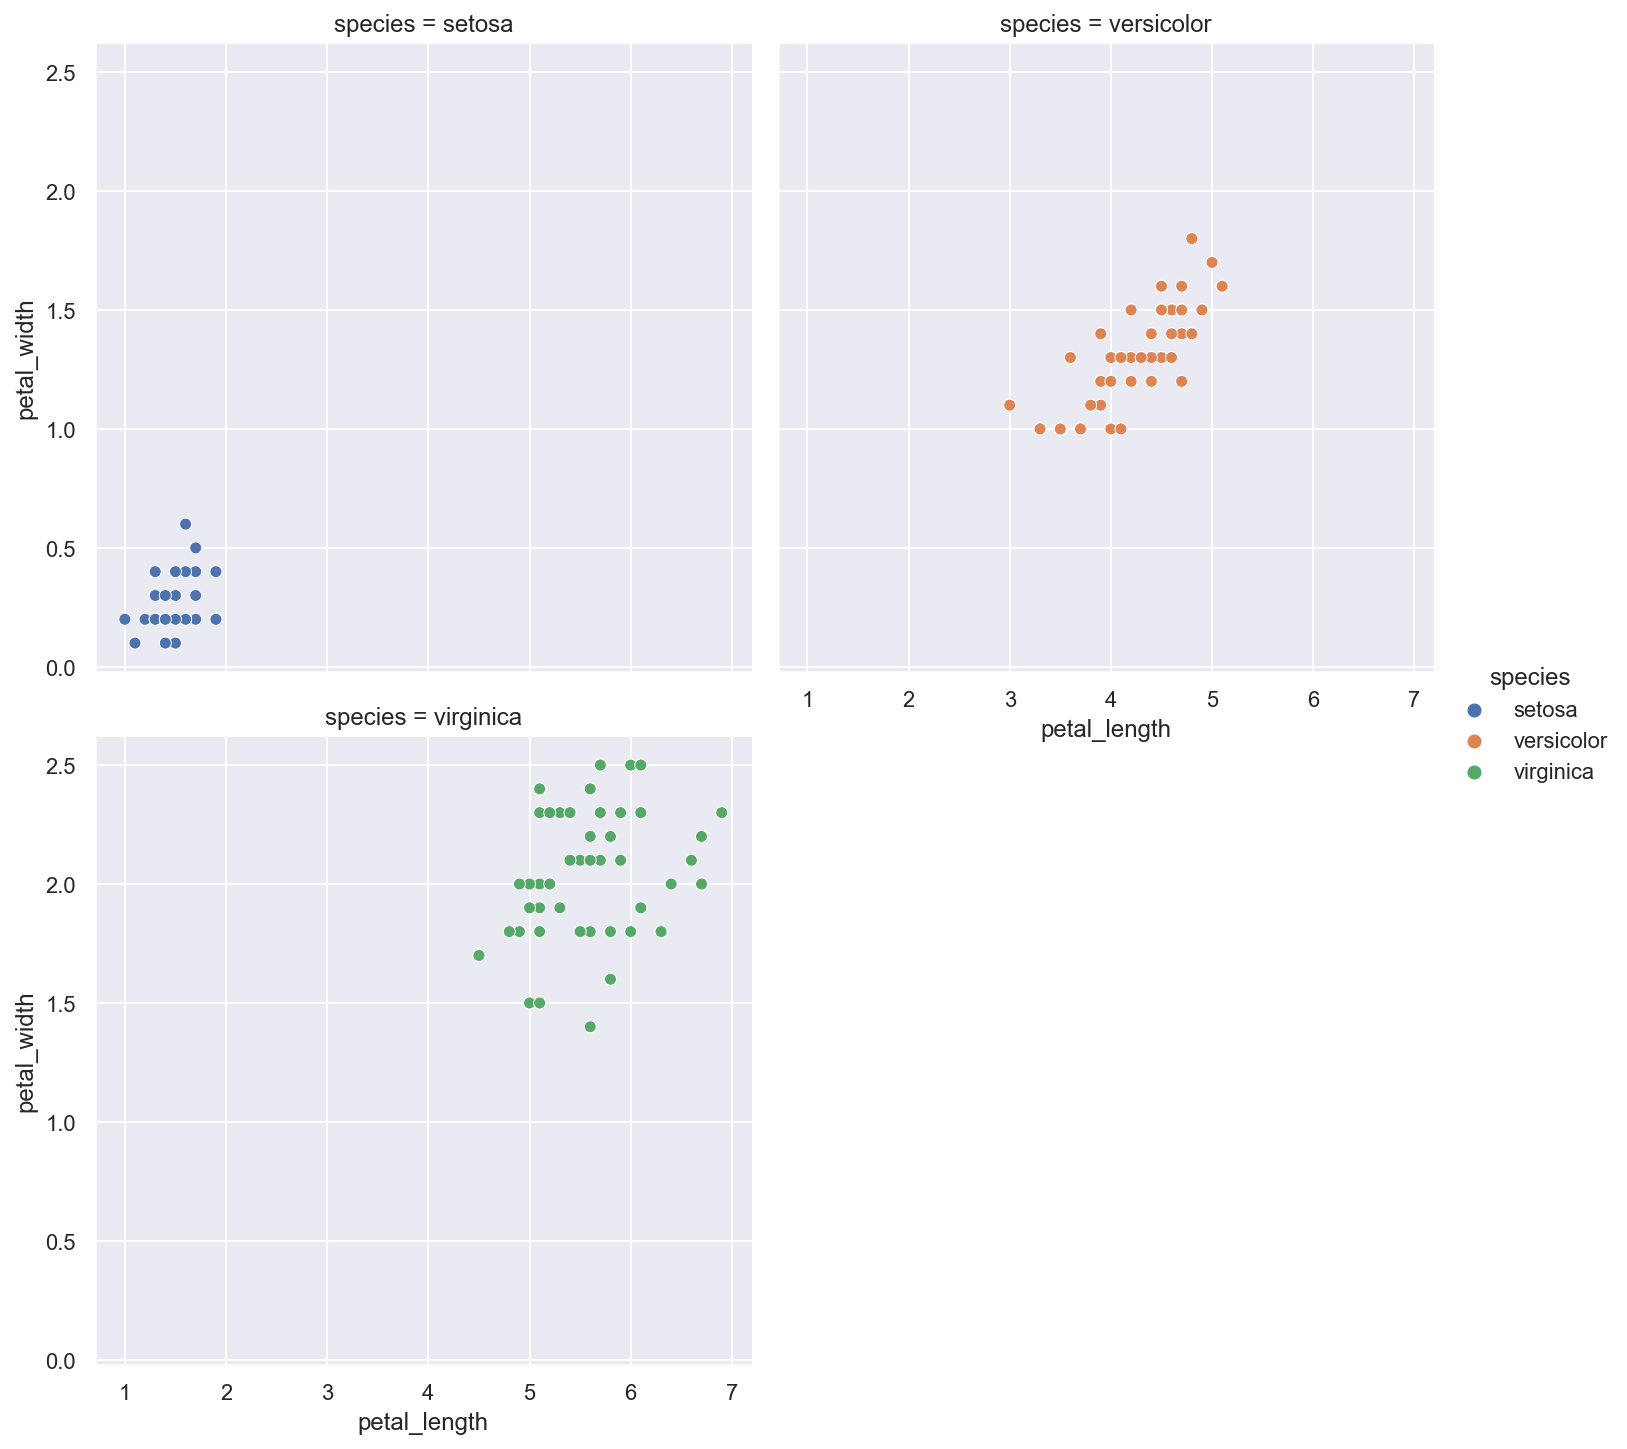

In [75]:
# scatterplot을 서브플롯으로 나타내기(종 별) -> relplot(관계형 그래프에서 서브플롯을 그리는 함수)
sns.relplot(data=iris, x='petal_length', 
                y='petal_width', hue='species', # 기본값은 scatter
            col='species', col_wrap=2) # col 단위로 서브플롯 표현
                                       # col_wrap : 한줄에 표현될 subplot

### 3.3.2 범주형 그래프(categorical plots)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

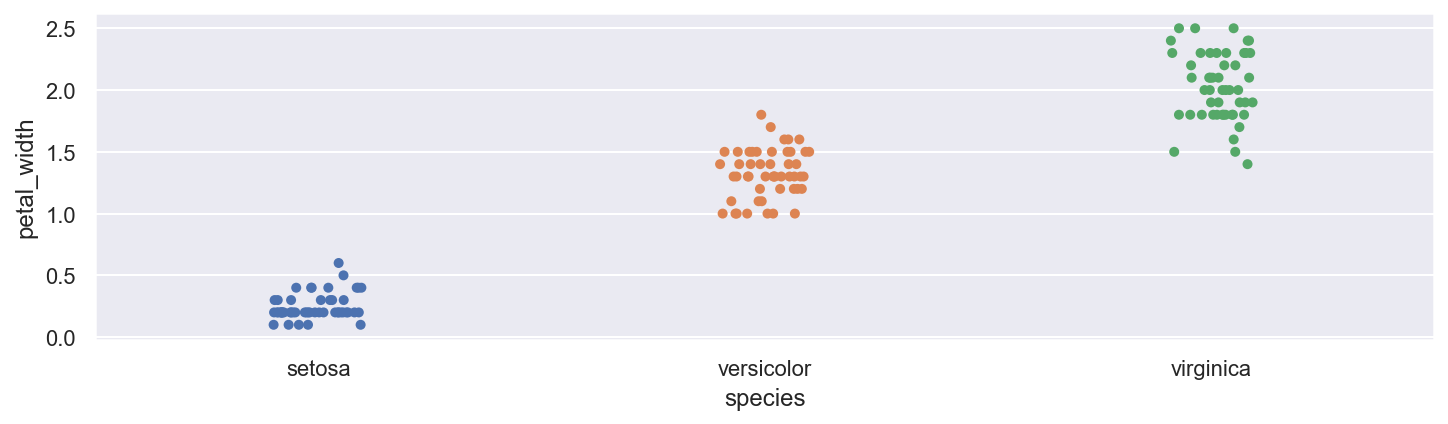

In [66]:
plt.figure(figsize = (12, 3))

# 종 별 petal_width의 값을 산점도로 나타내기
sns.stripplot(data=iris, x='species', y='petal_width')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

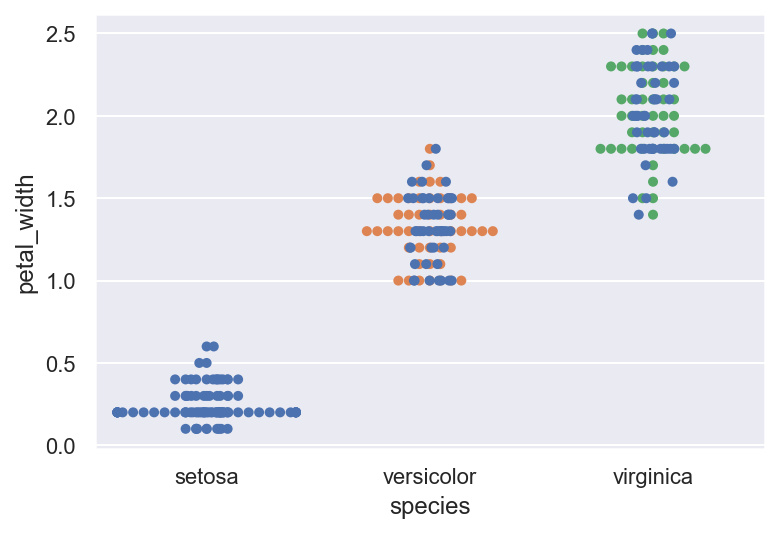

In [68]:
# x축이 범주형일 때 쓰는 산점도 : 점들이 중첩되지 않게
sns.swarmplot(data=iris, x='species', y='petal_width')
# sns.stripplot(data=iris, x='species', y='petal_width', color = 'b')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

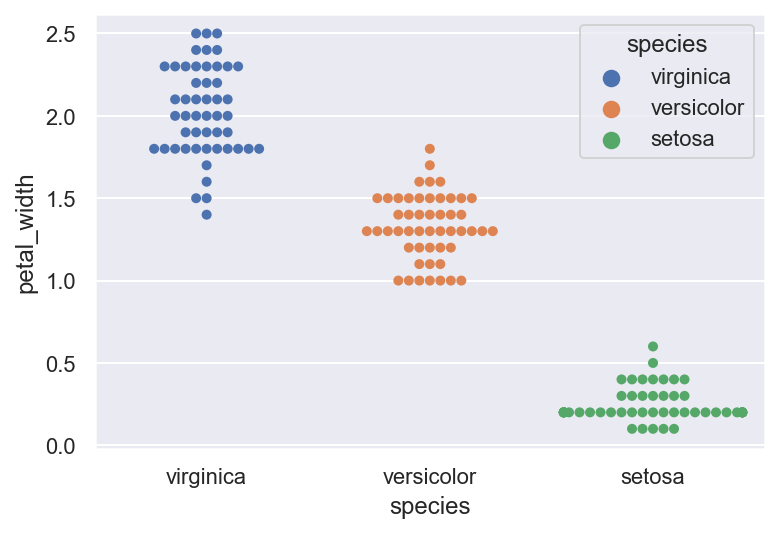

In [70]:
sns.swarmplot(data=iris.sort_values('petal_width', ascending=False),
              x='species', y='petal_width')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

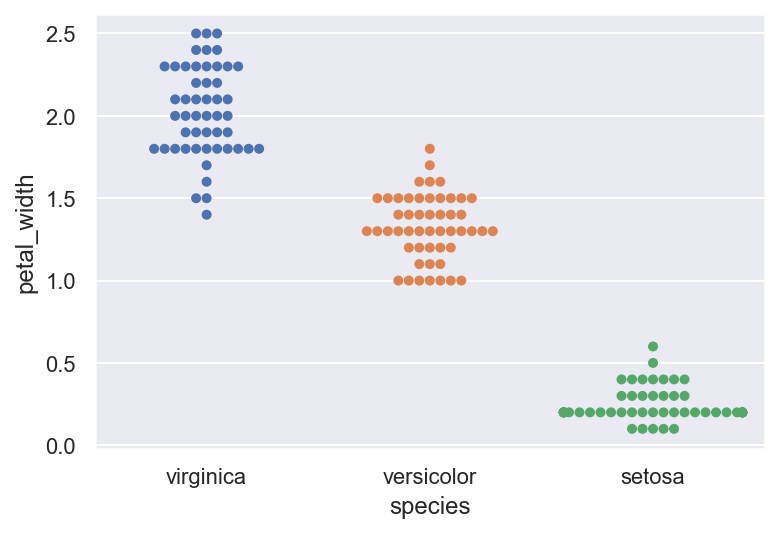

In [71]:
sns.swarmplot(data=iris, x='species', y='petal_width', 
              order=['virginica', 'versicolor', 'setosa'])

In [72]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='sex', ylabel='survived'>

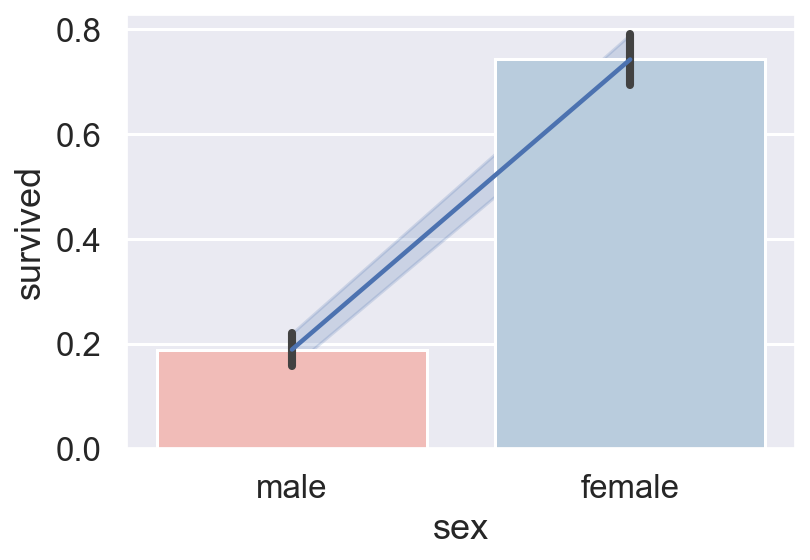

In [79]:
# 성별 survived의 평균을 막대그래프로 나타내기
sns.set(context='talk')
sns.barplot(data=titanic, x='sex', y='survived', palette='Pastel1')
sns.lineplot(data=titanic, x='sex', y='survived')

<AxesSubplot:xlabel='sex', ylabel='survived'>

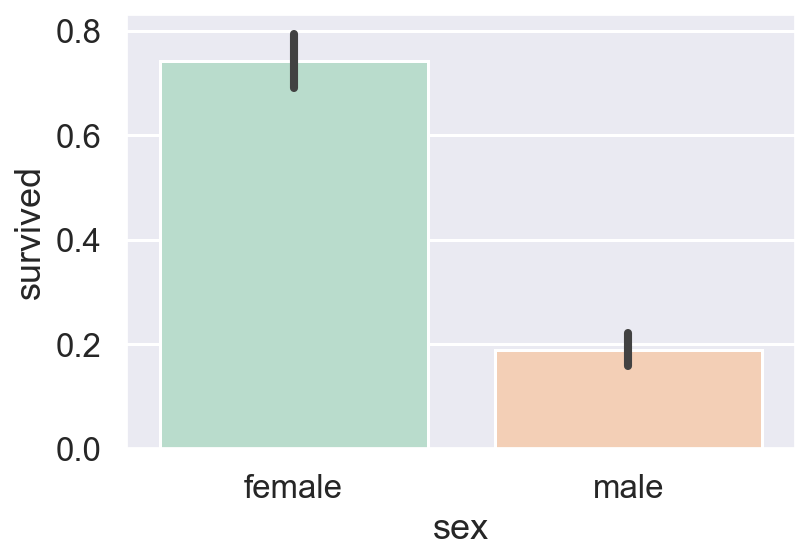

In [80]:
sns.barplot(data=titanic, x='sex', y='survived', palette='Pastel2', 
            order=['female', 'male'])

<AxesSubplot:xlabel='sex', ylabel='survived'>

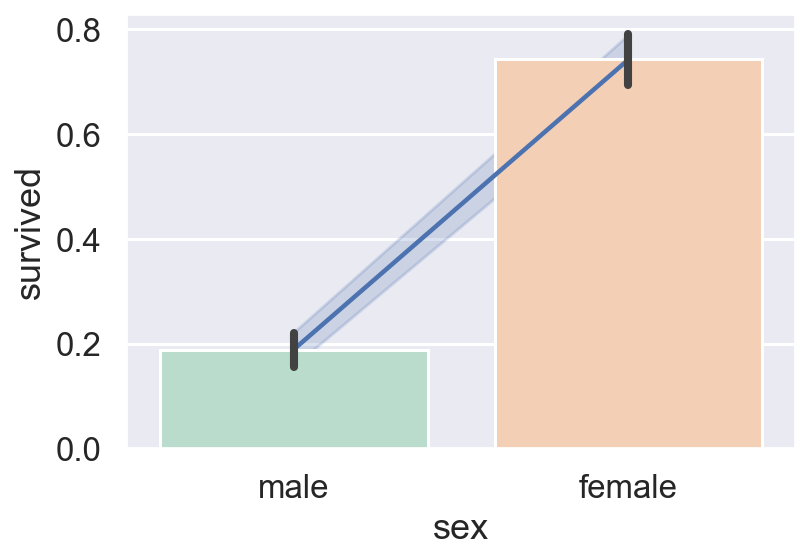

In [81]:
sns.lineplot(data=titanic, x='sex', y='survived') # 먼저 사용한 그래프가 위로
sns.barplot(data=titanic, x='sex', y='survived', palette='Pastel2')

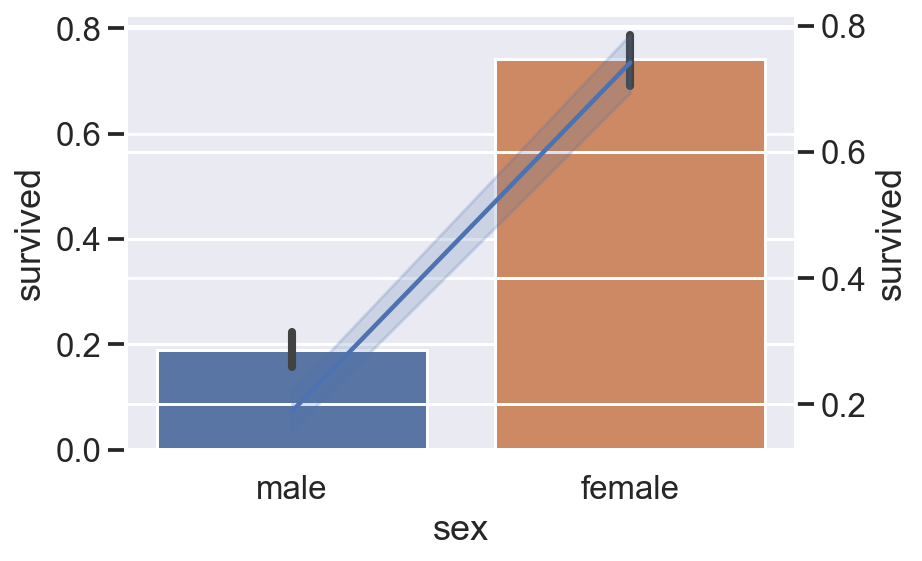

In [82]:
# 축 공유
fig, ax1 = plt.subplots()
sns.barplot(data=titanic, x='sex', y='survived', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=titanic, x='sex', y='survived', ax=ax2)

plt.show()

<AxesSubplot:xlabel='sex', ylabel='survived'>

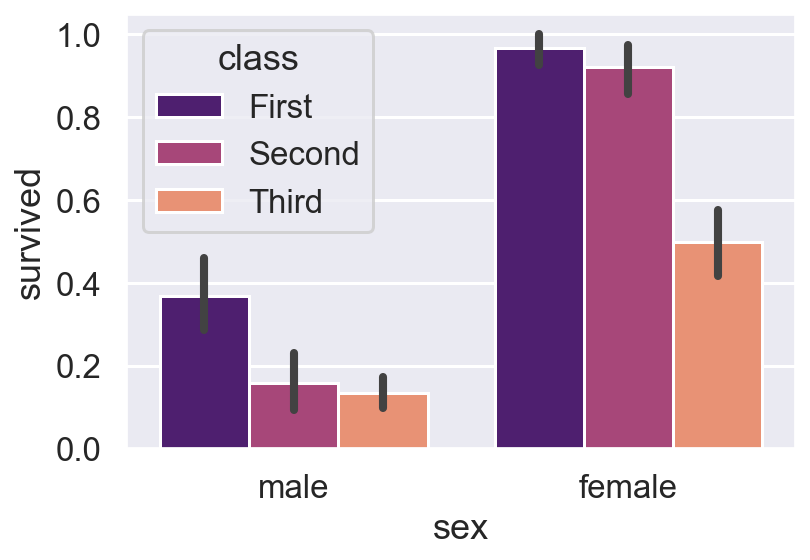

In [89]:
# class별로 성별 생존률 평균 하나의 막대그래프
sns.set(context = 'talk')
sns.barplot(data=titanic, x='sex', y='survived', hue='class', palette='magma')

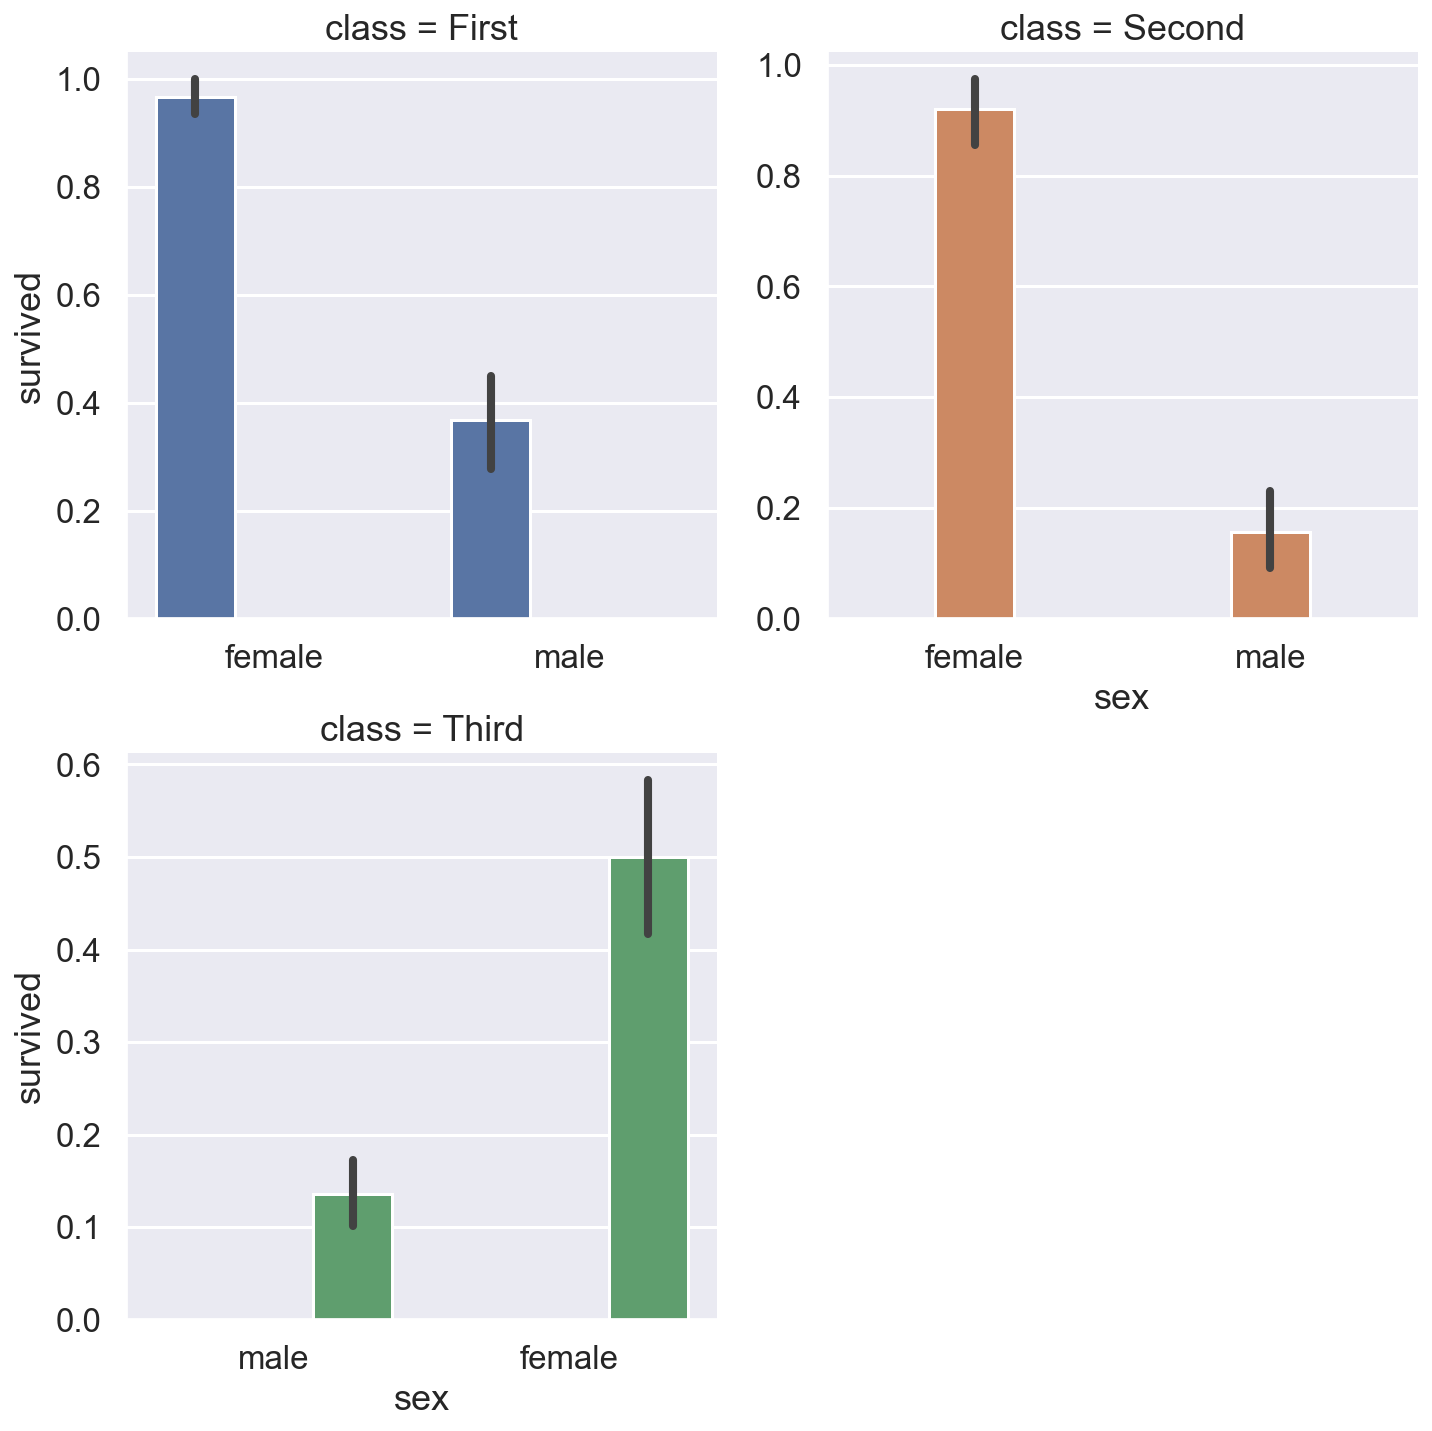

In [93]:
# class별로 성별 생존률 평균 막대그래프를 subplot으로 나타내기
sns.catplot(data=titanic, x='sex', 
            y='survived', hue='class', # 기본값은 scatter
            col='class', col_wrap=2, 
            kind='bar', sharey=False, sharex=False) # col 단위로 서브플롯 표현
                                       # col_wrap : 한줄에 표현될 subplot

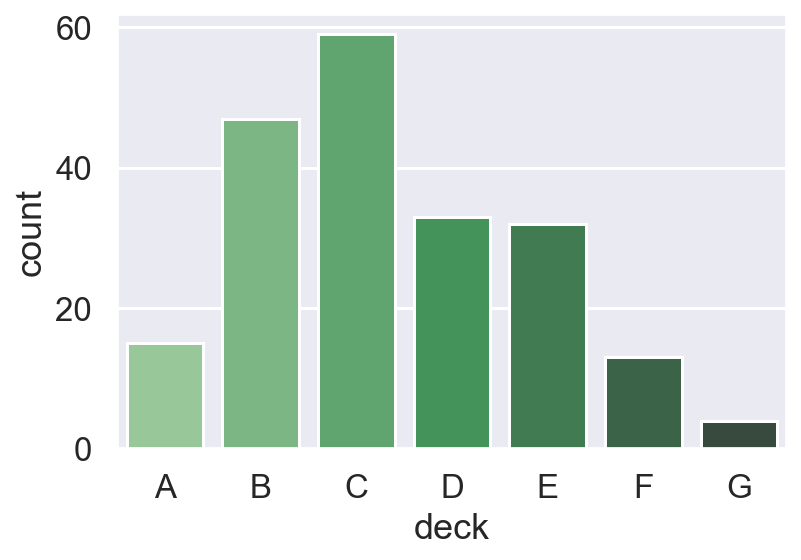

In [99]:
# deck별 관측수를 막대그래프로
sns.countplot(data=titanic, x='deck', palette='Greens_d')

plt.show()

<AxesSubplot:xlabel='class', ylabel='survived'>

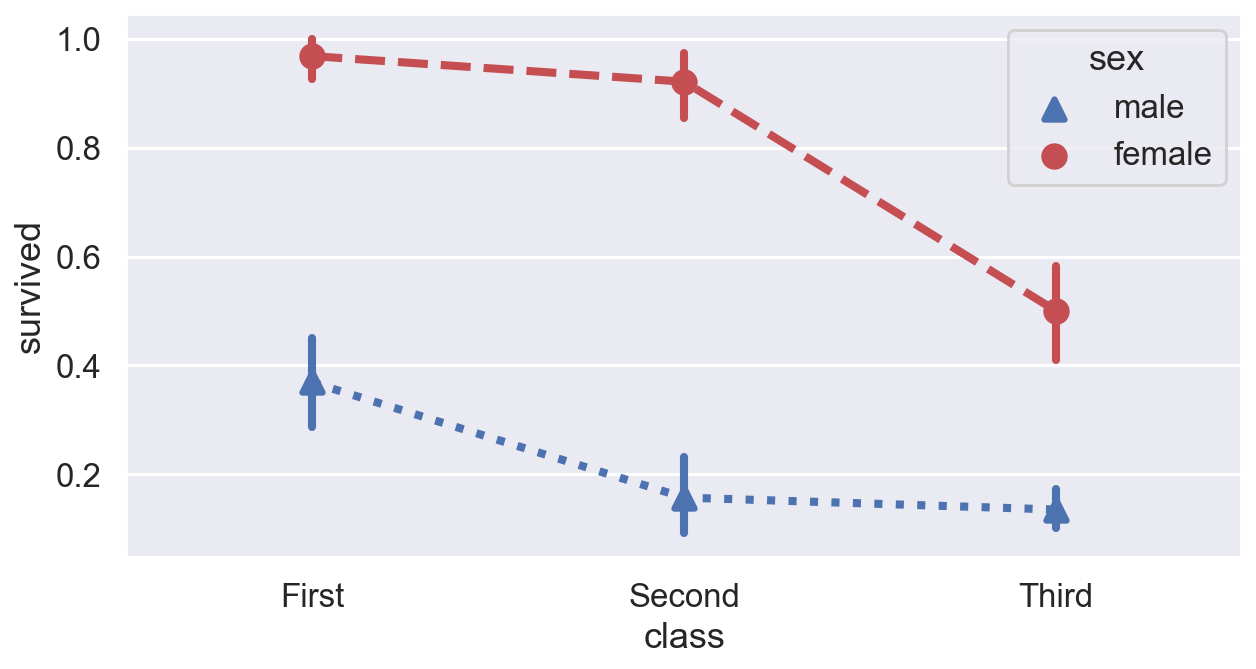

In [104]:
# class별 survived 값을 sex별로 pointplot
plt.figure(figsize=(10, 5))
sns.pointplot(data=titanic, x='class', y='survived', 
              hue='sex', palette={'male':'b', 'female':'r'}, 
              markers=['^', 'o'], linestyles=[':', '--'])

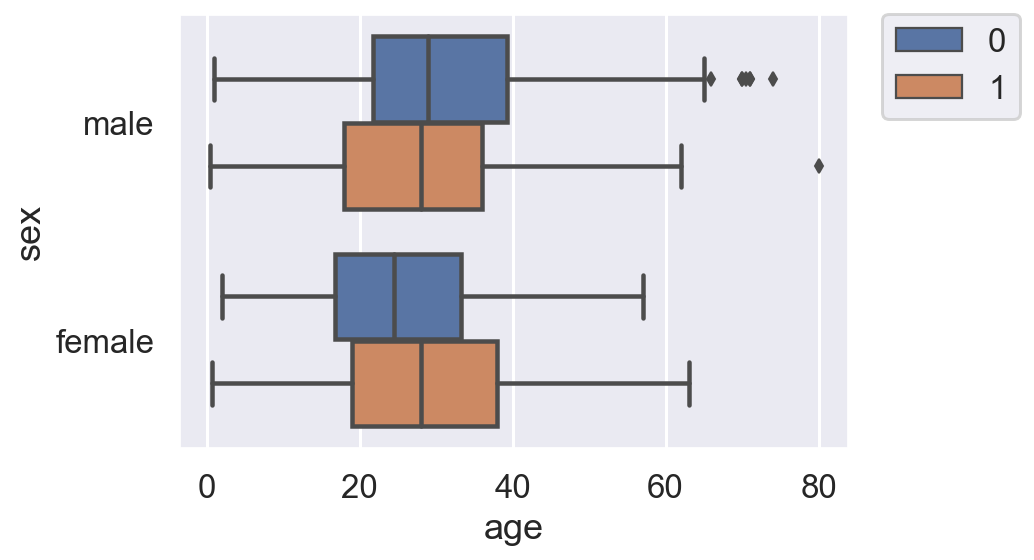

In [106]:
# boxplot, boxenplot, violinplot
sns.boxplot(data=titanic, x='age', y='sex', hue='survived')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

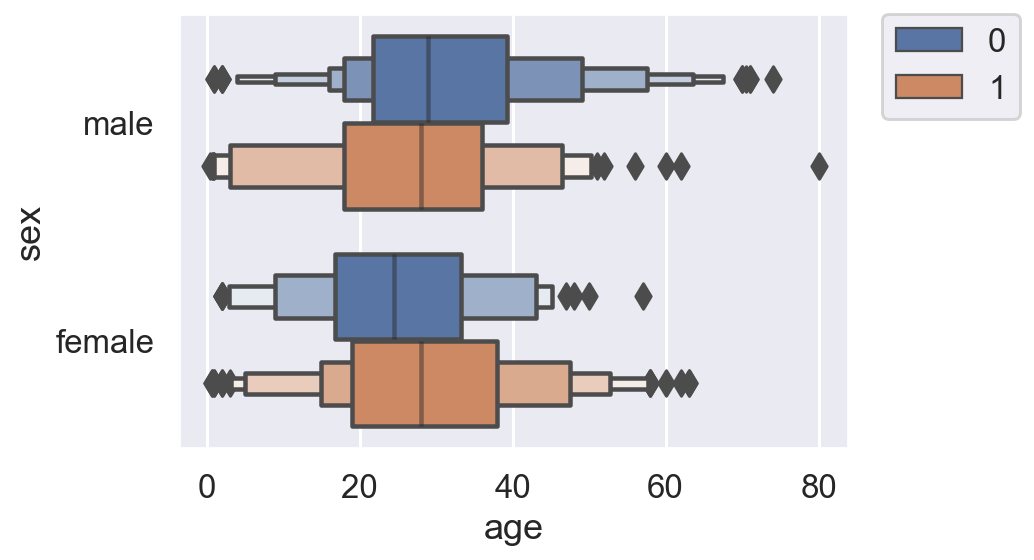

In [107]:
sns.boxenplot(data=titanic, x='age', y='sex', hue='survived')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

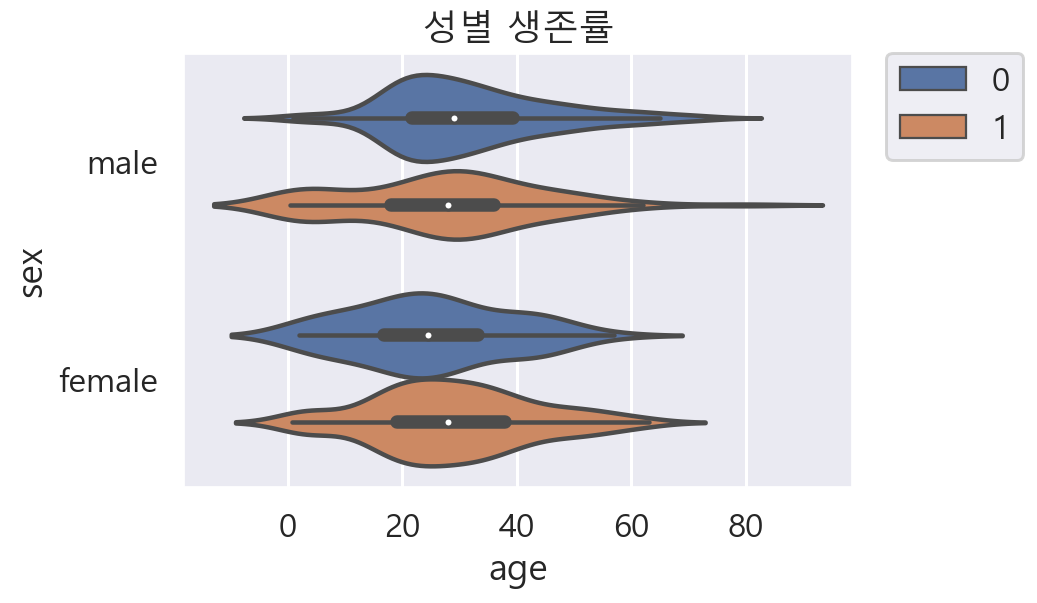

In [111]:
g = sns.violinplot(data=titanic, x='age', y='sex', hue='survived')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set(title='성별 생존률')
plt.show()

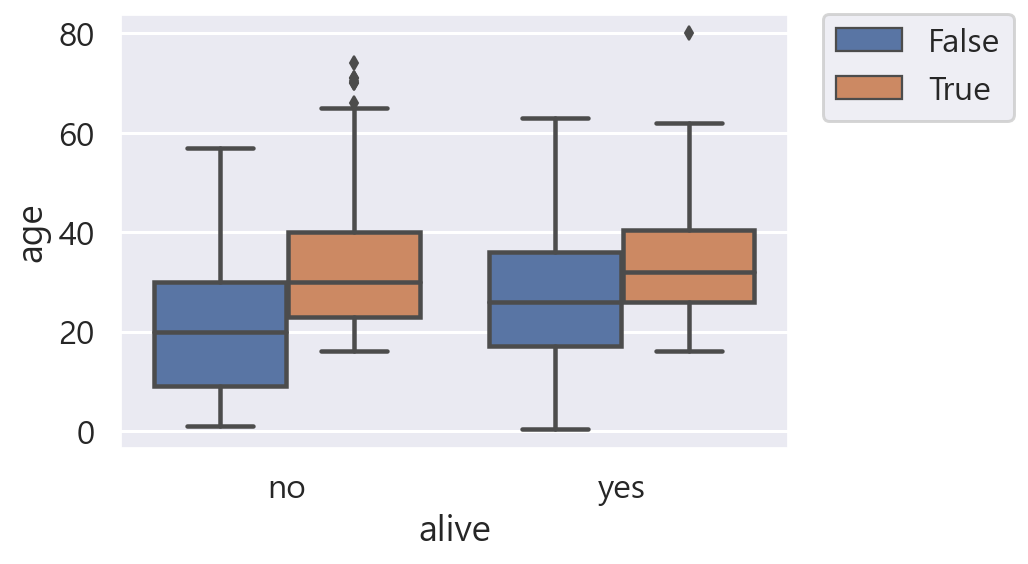

In [113]:
sns.boxplot(data=titanic, x='alive', y='age', hue='adult_male')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 3.3.3 쌍관계 그래프

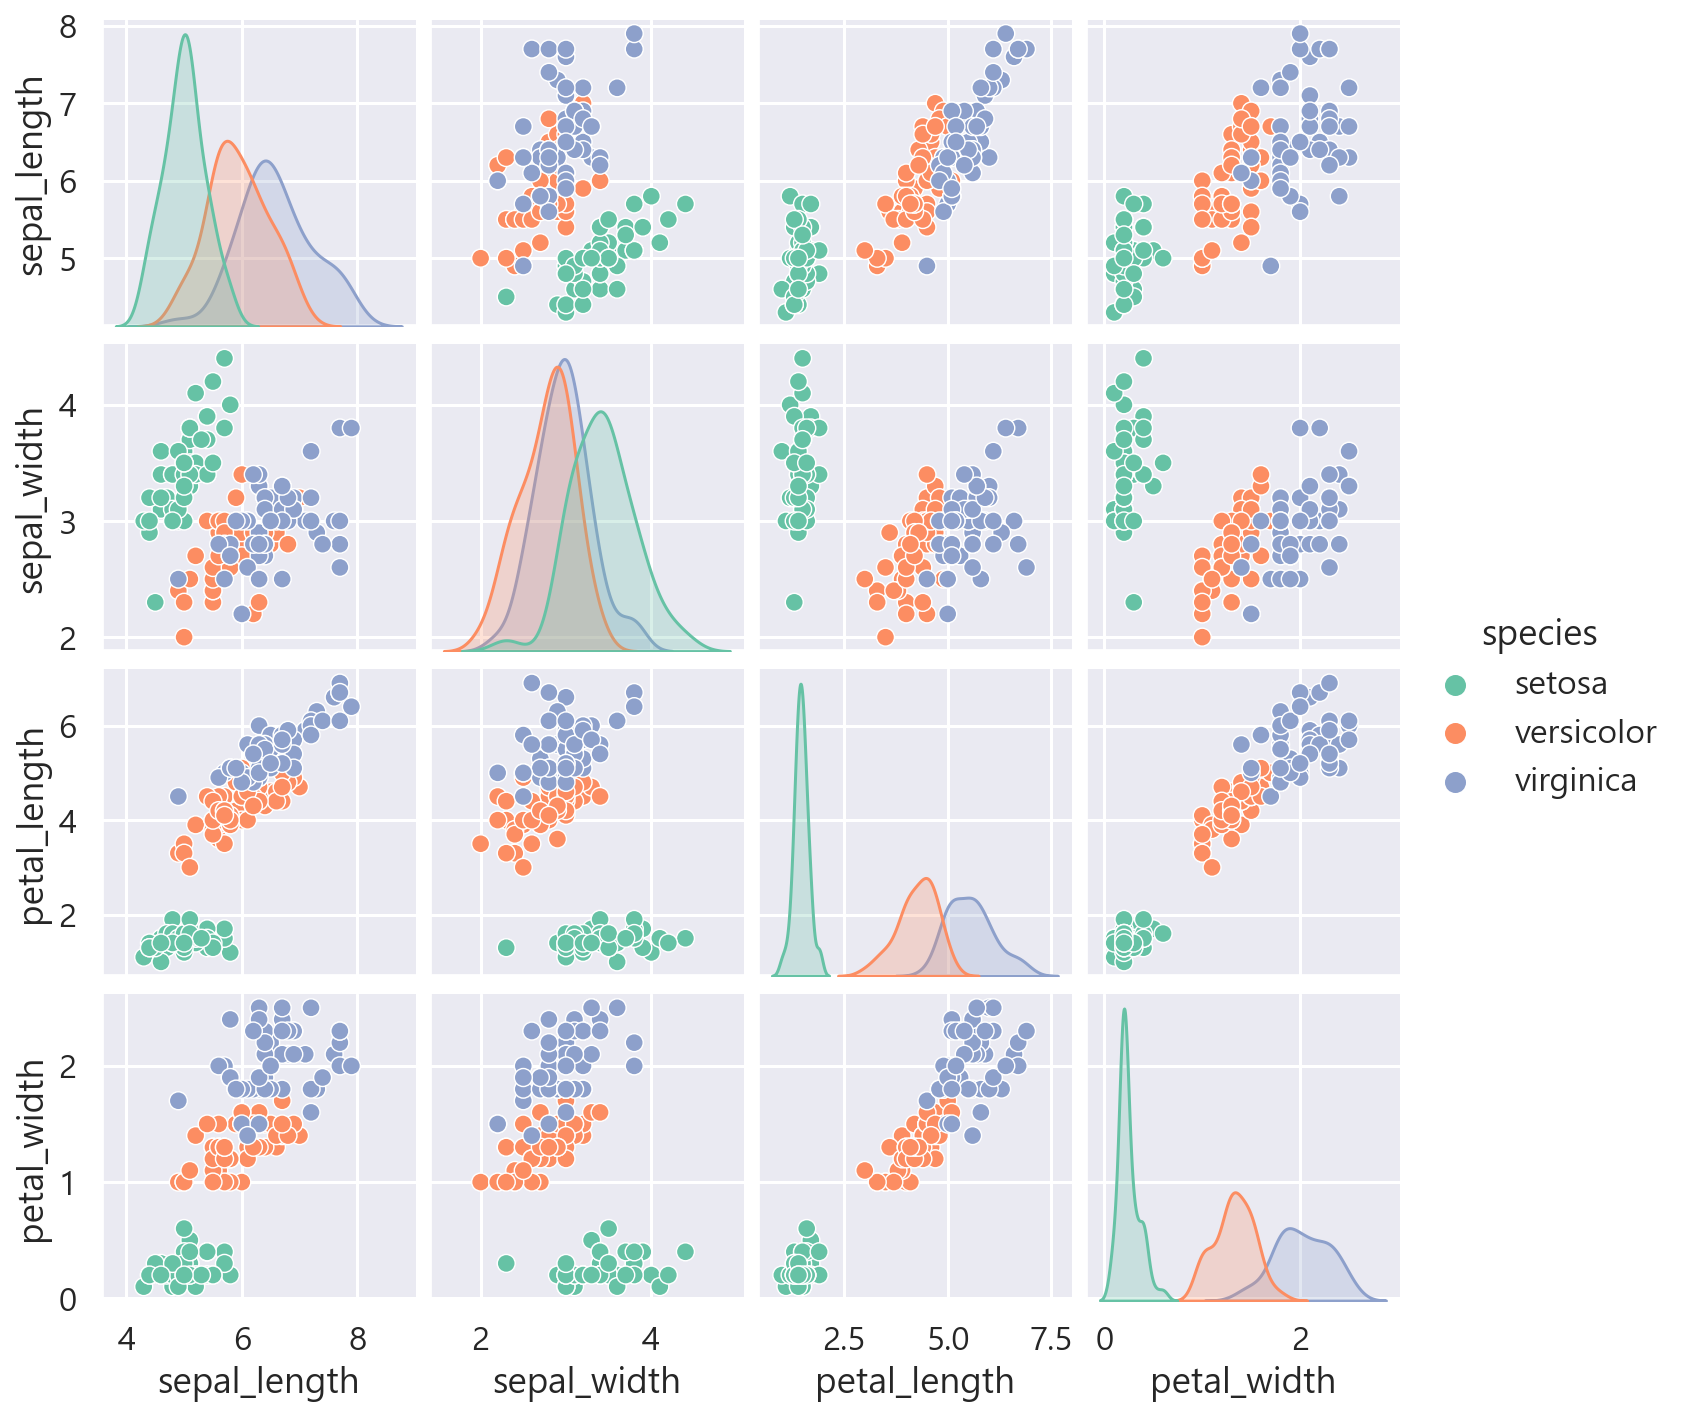

In [116]:
sns.pairplot(data=iris, hue='species', palette='Set2')

In [117]:
x = np.random.randn(10000)

### 3.3.4 밀도 그래프

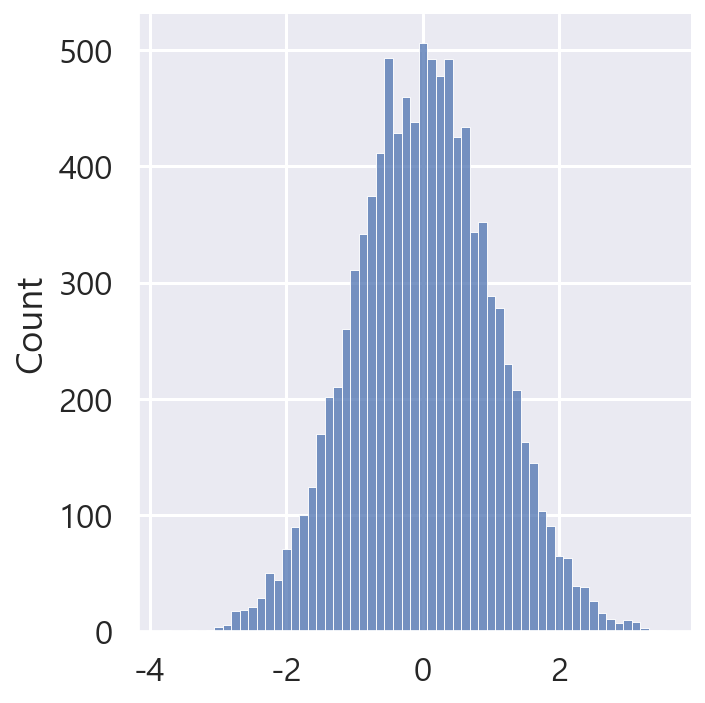

In [118]:
sns.displot(x, kde=False)

### 3.3.5 회귀 그래프

In [122]:
# 상관관계
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

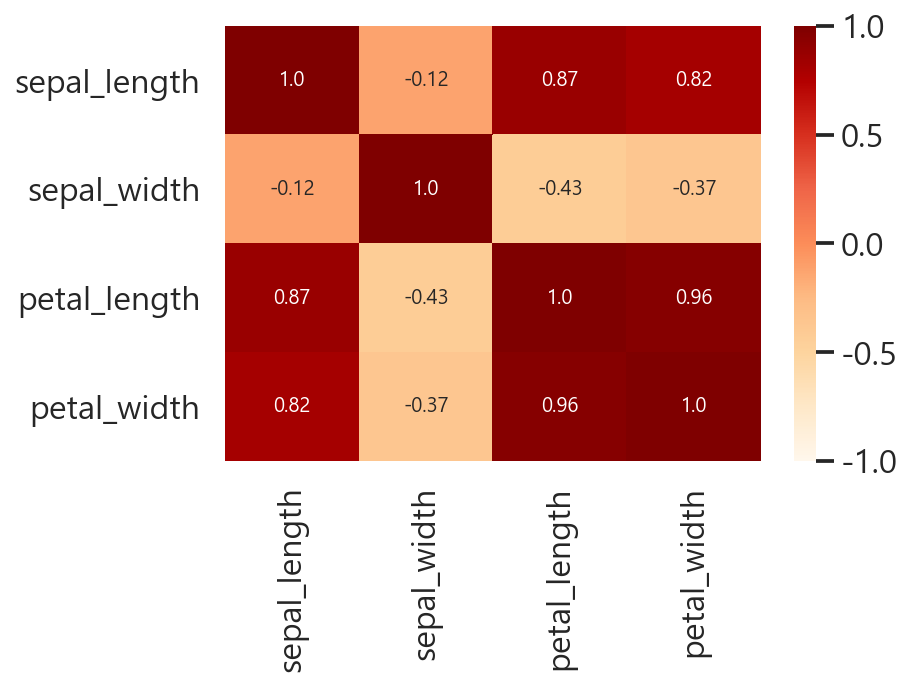

In [126]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1, 
            annot=True, cmap='OrRd', fmt='.2')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

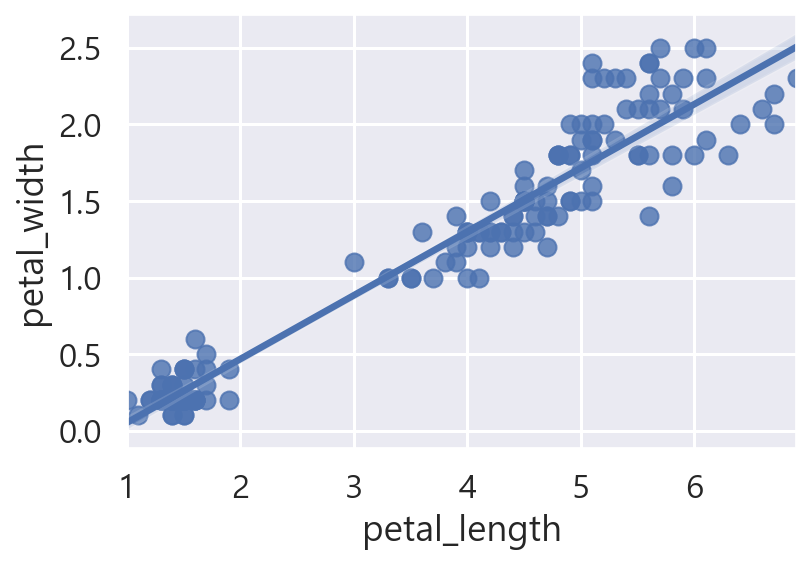

In [127]:
# 회귀 모형을 만드는 함수: regplot(hue 사용불가), lmplot
sns.regplot(data=iris, x='petal_length', y='petal_width')

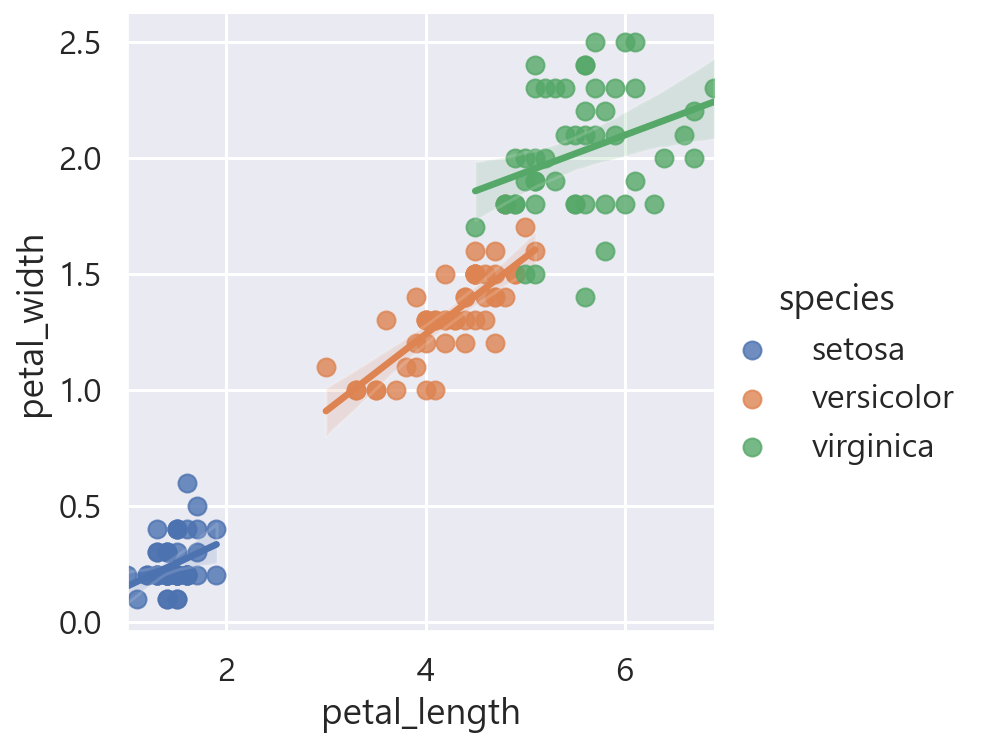

In [129]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species')

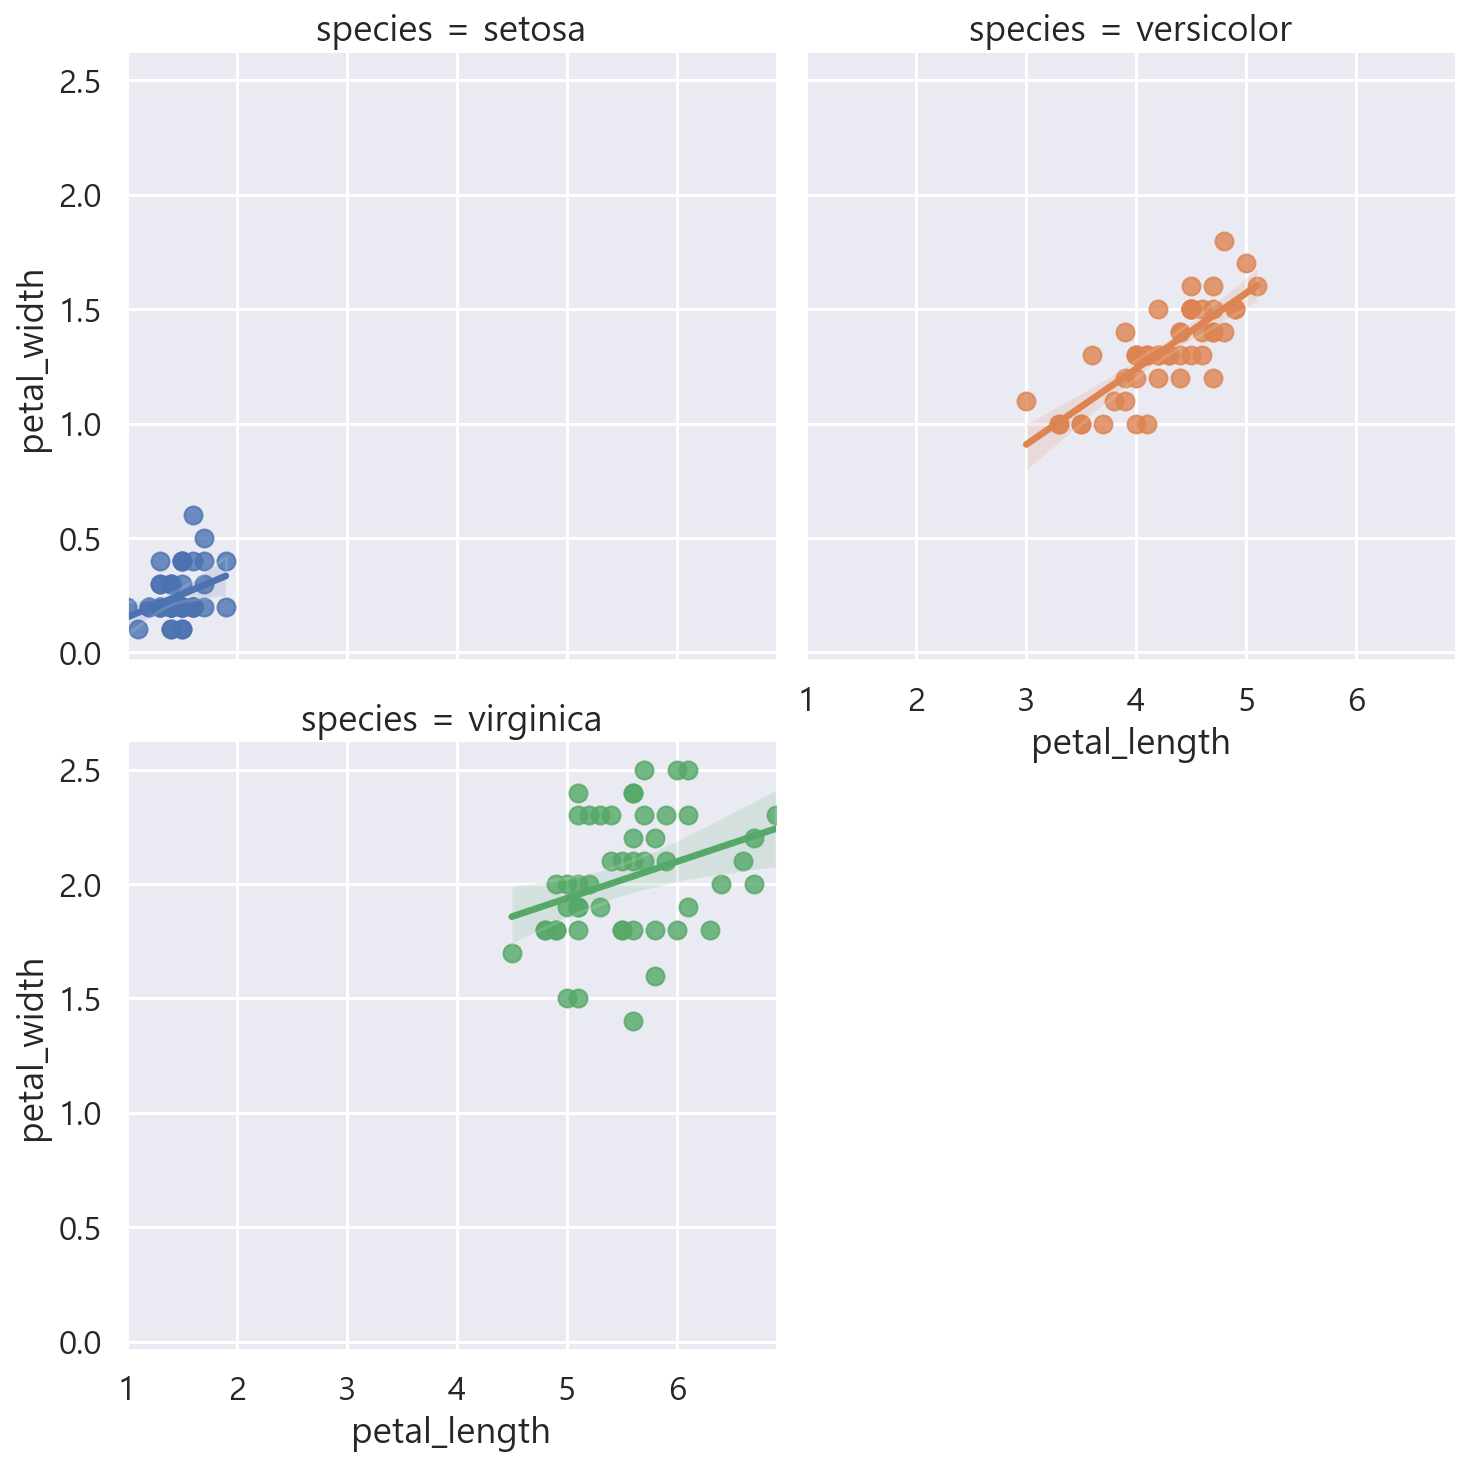

In [131]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', 
           col='species', col_wrap=2)

## 3.4 다중 그래프를 위한 FacetGrid
https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

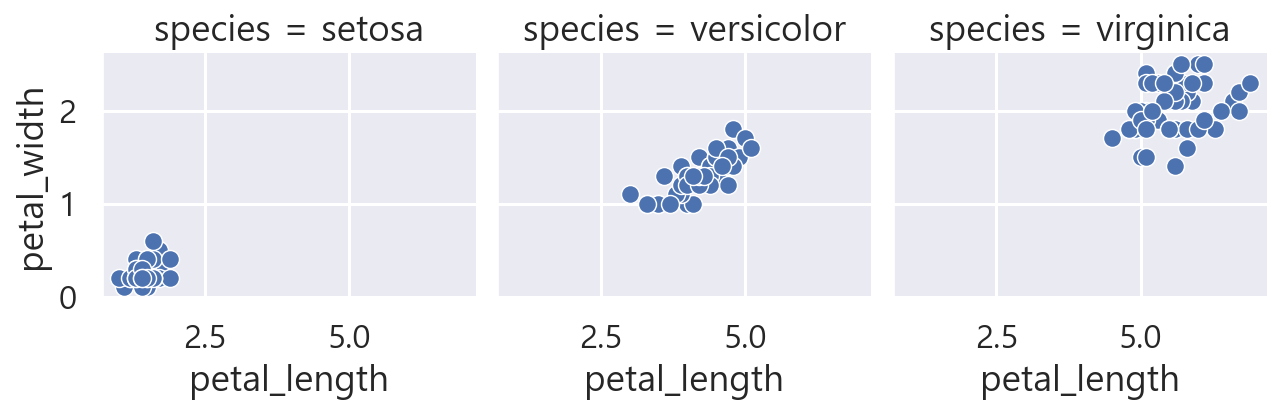

In [134]:
g = sns.FacetGrid(iris, col='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')

plt.savefig('Data/ch13_test.png')

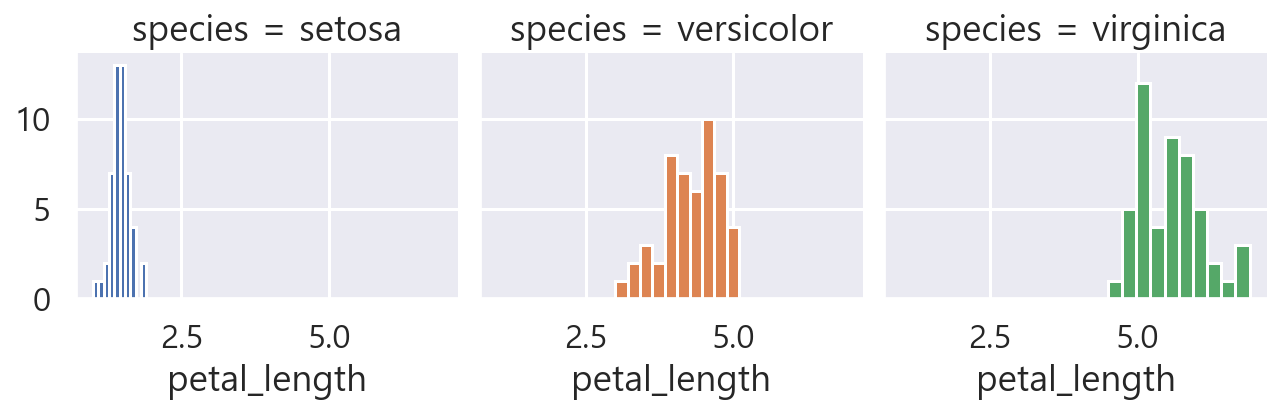

In [137]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(plt.hist, 'petal_length')
g.set_axis_labels(y_vars='count')

plt.show()